In [ ]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [ ]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [ ]:
# Tensorflow
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, GRU

from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tensorflow.keras.utils import plot_model

In [ ]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [ ]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler는 입력 데이터를 0과 1 사이의 범위로 변환


### 데이터 가져오기




In [ ]:
# 데이터 로드
train_df = pd.read_csv('open/train.csv')
test_df = pd.read_csv('open/test.csv')
submission_df = pd.read_csv('open/sample_submission.csv')

### 전처리 시작!!

In [ ]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day

In [ ]:
train_df[(train_df['month'] == 1) & (train_df['day'] == 1) & (train_df['price(원/kg)'] == 0.0)]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
365,TG_A_J_20200101,2020-01-01,TG,A,J,0.0,0.0,2020,1,1
731,TG_A_J_20210101,2021-01-01,TG,A,J,0.0,0.0,2021,1,1
1096,TG_A_J_20220101,2022-01-01,TG,A,J,0.0,0.0,2022,1,1
1461,TG_A_J_20230101,2023-01-01,TG,A,J,0.0,0.0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...
57874,RD_F_J_20190101,2019-01-01,RD,F,J,0.0,0.0,2019,1,1
58239,RD_F_J_20200101,2020-01-01,RD,F,J,0.0,0.0,2020,1,1
58605,RD_F_J_20210101,2021-01-01,RD,F,J,0.0,0.0,2021,1,1
58970,RD_F_J_20220101,2022-01-01,RD,F,J,0.0,0.0,2022,1,1


In [ ]:
def get_season(month):
    if month == 12 or month == 1 or month == 2:
        return 'winter'
    elif month == 3 or month == 4 or month == 5:
        return 'spring'
    elif month == 6 or month == 7 or month == 8:
        return 'summer'
    elif month == 9 or month == 10 or month == 11:
        return 'fall'
    else:
        return np.nan

train_df['season'] = train_df['month'].apply(get_season)

In [ ]:
train_data_sub =  train_df[ train_df['supply(kg)'] > 0]

In [ ]:
items = train_df['item'].unique()
corporations = train_df['corporation'].unique()
seasons = train_df['season'].unique()

average_prices = {}

for item in items:
    for corporation in corporations:
        for season in seasons:
            condition = (train_data_sub['item'] == item) & (train_data_sub['corporation'] == corporation) & (train_data_sub['season'] == season)
            avg_data = train_data_sub[condition]

            avg_price = avg_data['price(원/kg)'].mean()

            if not np.isnan(avg_price):
                var_name = f"{item}_{corporation}_{season}"
                average_prices[var_name] = avg_price

                print(f"{var_name}: {avg_price}")

def replace_zero(x):
    if x['price(원/kg)'] == 0:
        key = f"{x['item']}_{x['corporation']}_{x['season']}"
        if key in average_prices:
            x['price(원/kg)'] = average_prices[key]
    return x

train_data_new = train_df.apply(replace_zero, axis=1)

print("\nAverage prices train:")
print(train_data_new)


TG_A_winter: 2147.5527559055117
TG_A_spring: 5636.957371225577
TG_A_summer: 6759.160896130346
TG_A_fall: 2843.3485113835377
TG_B_winter: 2006.5438335809806
TG_B_spring: 5555.956912028725
TG_B_summer: 6508.527118644068
TG_B_fall: 2878.5760135135133
TG_C_winter: 2408.9211309523807
TG_C_spring: 6717.4455782312925
TG_C_summer: 6967.38768718802
TG_C_fall: 3074.498275862069
TG_D_winter: 2037.5969696969696
TG_D_spring: 5964.845849802372
TG_D_summer: 5856.810344827586
TG_D_fall: 2612.6947723440135
TG_E_winter: 1910.839762611276
TG_E_spring: 5205.858407079646
TG_E_summer: 5790.329457364341
TG_E_fall: 2480.770154373928
CR_A_winter: 1403.7942386831276
CR_A_spring: 1408.047619047619
CR_A_summer: 2807.7301587301586
CR_A_fall: 3322.492537313433
CR_B_winter: 1338.2191780821918
CR_B_spring: 1107.8833333333334
CR_B_fall: 976.0
CR_C_winter: 1254.830357142857
CR_C_spring: 1285.7307692307693
CR_C_fall: 937.8
CR_D_winter: 1349.596214511041
CR_D_spring: 1224.4117647058824
CR_D_fall: 1008.625
CR_E_winter: 12

In [ ]:
import datetime as dt
def zero_sunday(x):
  for i in range(len(x)):
    if x['timestamp'][i].weekday() == 6:
      x['price(원/kg)'][i] = 0
      x['supply(kg)'][i] = 0
  return x

In [ ]:
zero_sunday(train_data_new)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,season
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,2147.552756,2019,1,1,winter
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,2147.552756,2019,1,2,winter
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.000000,2019,1,3,winter
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.000000,2019,1,4,winter
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.000000,2019,1,5,winter
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.000000,2023,2,27,winter
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.000000,2023,2,28,winter
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.000000,2023,3,1,spring
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.000000,2023,3,2,spring


In [ ]:
train_df = train_data_new

In [ ]:
# 날짜 형식 변환 및 정렬
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
train_df = train_df.sort_values(by='timestamp') # LSTM 모델을 쓸건데 시간순서대로 있으면 잘 학습함 그래서 정렬
test_df = test_df.sort_values(by='timestamp')

In [ ]:
# 결측치 처리
#train_df = train_df.dropna(subset=['supply(kg)', 'price(원/kg)'])  #dropna는 pandas에서 제공하는 결측치 제거 함수

In [ ]:
# 필요 없는 열 제거 (ID 열 제거)
train_df = train_df.drop(columns=['ID'])
test_df = test_df.drop(columns=['ID'])
train_df = train_df.drop(columns=['location'])
test_df = test_df.drop(columns=['location'])
train_df = train_df.drop(columns=['supply(kg)'])
train_df = train_df.drop(columns=['season'])

In [ ]:
# 시간 관련 피쳐 생성 (모델이 시간에 따른 주기적 패턴을 학습할 수 있도록)
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day
train_df['day_of_week'] = train_df['timestamp'].dt.dayofweek
train_df['year'] = train_df['timestamp'].dt.year

test_df['month'] = test_df['timestamp'].dt.month
test_df['day'] = test_df['timestamp'].dt.day
test_df['day_of_week'] = test_df['timestamp'].dt.dayofweek
test_df['year'] = test_df['timestamp'].dt.year

In [ ]:
# 범주형 데이터 인코딩
train_df = pd.get_dummies(train_df, columns=['item', 'corporation'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['item', 'corporation'], drop_first=True)

In [ ]:
# train_df와 test_df의 열 맞추기
missing_cols = set(train_df.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[train_df.columns.drop('price(원/kg)')]

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler_s = StandardScaler()
scaler_p = StandardScaler()
train_df['price(원/kg)'] = scaler_p.fit_transform(train_df[['price(원/kg)']])

In [ ]:
# 훈련 데이터와 테스트 데이터 분할
train_data = train_df[train_df['timestamp'] < '2023-03-04']
X = train_data.drop(['timestamp', 'price(원/kg)'], axis=1).values
y = train_data['price(원/kg)'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 테스트 데이터 분할
X_test = test_df.drop(['timestamp'], axis=1).values

In [ ]:
# 데이터 타입 변환
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
y_valid = y_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [ ]:
# 데이터 reshape (LSTM모델을 쓸건데 LSTM모델은 3차원만 입력받아요)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid_reshaped = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### 모델링!!!

In [ ]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 13, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 13, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 13, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 13, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 13, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mean_absolute_error'])

In [ ]:
# 모델 학습
history = model.fit(X_train_reshaped, y_train, validation_data=(X_valid_reshaped, y_valid), batch_size=32, epochs=50)

Epoch 1/50
1485/1485 [==============================] - 21s 14ms/step - loss: 0.3795 - mean_absolute_error: 0.4278 - val_loss: 0.2591 - val_mean_absolute_error: 0.3267
Epoch 2/50
1485/1485 [==============================] - 19s 13ms/step - loss: 0.2284 - mean_absolute_error: 0.3145 - val_loss: 0.1562 - val_mean_absolute_error: 0.2653
Epoch 3/50
1485/1485 [==============================] - 19s 13ms/step - loss: 0.1937 - mean_absolute_error: 0.2789 - val_loss: 0.1278 - val_mean_absolute_error: 0.2182
Epoch 4/50
1485/1485 [==============================] - 20s 13ms/step - loss: 0.1408 - mean_absolute_error: 0.2234 - val_loss: 0.1191 - val_mean_absolute_error: 0.1935
Epoch 5/50
1485/1485 [==============================] - 20s 13ms/step - loss: 0.1944 - mean_absolute_error: 0.2629 - val_loss: 0.1445 - val_mean_absolute_error: 0.2431
Epoch 6/50
1485/1485 [==============================] - 20s 13ms/step - loss: 0.1563 - mean_absolute_error: 0.2326 - val_loss: 0.1408 - val_mean_absolute_error:

### 평가하자

In [ ]:
# 훈련 및 검증 과정 중의 MSE 값 확인
train_mse = history.history['loss']
valid_mse = history.history['val_loss']
train_mae = history.history['mean_absolute_error']
valid_mae = history.history['val_mean_absolute_error']

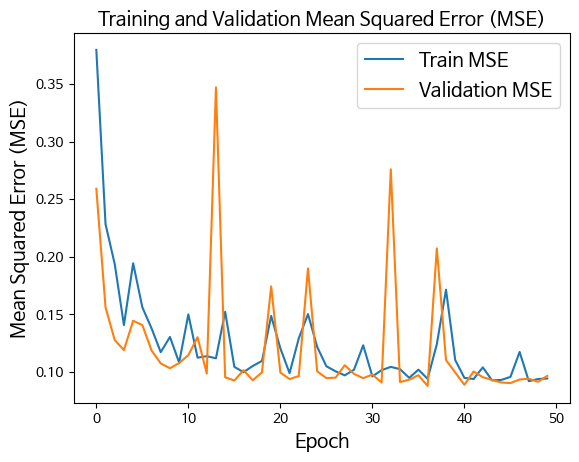

In [ ]:
# MSE 시각화
plt.plot(train_mse, label='Train MSE')
plt.plot(valid_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Mean Squared Error (MSE)')
plt.legend()

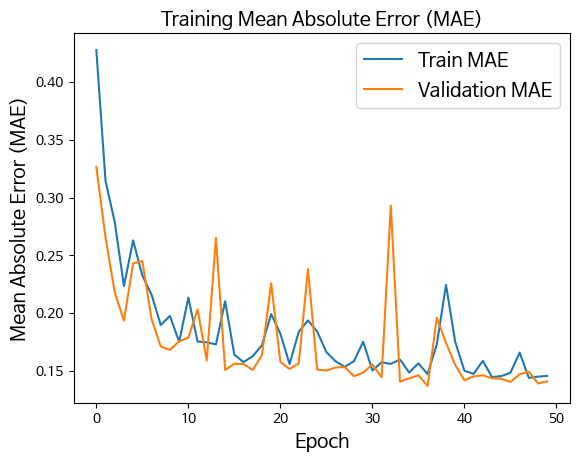

In [ ]:
# MAE 시각화
plt.plot(train_mae, label='Train MAE')
plt.plot(valid_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training Mean Absolute Error (MAE)')
plt.legend()

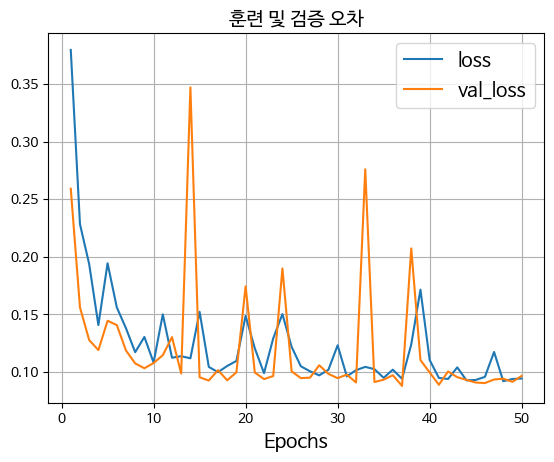

In [ ]:
disp_loss(history)

In [ ]:
# 마지막 에포크의 MSE 값 출력
print("Final Mean Squared Error (MSE):", train_mse[-1])
print("Final Mean Absolute Error (MAE):", train_mae[-1])

Final Mean Squared Error (MSE): 0.09444590657949448
Final Mean Absolute Error (MAE): 0.14578233659267426


In [ ]:
# 평가 함수 사용
mse, mae = model.evaluate(X_train_reshaped, y_train)
print("Mean Squared Error (MSE) on training data:", mse)
print("Mean Absolute Error (MAE) on training data:", mae)


1485/1485 [==============================] - 8s 5ms/step - loss: 0.0966 - mean_absolute_error: 0.1401
Mean Squared Error (MSE) on training data: 0.09657276421785355
Mean Absolute Error (MAE) on training data: 0.14013011753559113


In [ ]:
# 예측
predictions = model.predict(X_test_reshaped)


35/35 [==============================] - 1s 4ms/step


In [ ]:
# 예측 값 역변환 (inverse_transform)
predictions = scaler_p.inverse_transform(predictions)

In [ ]:
# 예측 결과 저장
submission_df['answer'] = predictions
submission_df.to_csv('submission.csv', index=False)

In [ ]:
# 저장된 파일 읽기
submission_df = pd.read_csv('submission.csv')

In [ ]:
from google.colab import files

# 파일 다운로드
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>